### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
sns.set() # setting seaborn default for plots
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### loading Titanic dataset

In [0]:
df=pd.read_csv('https://gist.githubusercontent.com/avmain/284b549eabc13061ce2b0b58b163c7f9/raw/ff20885745fea9ab5be6e900aad4c2cb1d08f936/titanic_data_set.csv',error_bad_lines=False)

### Data Preprocessing

In [0]:
df=df.drop(['Cabin'],axis=1)
df['Age']=df['Age'].fillna(df['Age'].mean())
df=df.dropna()

#taking care of categorical data
df['Gender'] = df.Sex.apply(lambda x:1 if x == 'male' else 0)
df=df.drop(['Name'],axis=1)
df=df.drop(['Sex'],axis=1)
df=df.drop(['Ticket'],axis=1)

In [0]:
df = df[["PassengerId","Pclass","Age","SibSp","Fare","Embarked","Gender","Survived"]]

In [7]:
print(df.shape)
df.head()

(889, 8)


,PassengerId,Pclass,Age,SibSp,Fare,Embarked,Gender,Survived
0,1,3,22.0,1,7.2500,S,1,0
1,2,1,38.0,1,71.2833,C,0,1
2,3,3,26.0,0,7.9250,S,0,1
3,4,1,35.0,1,53.1000,S,0,1
4,5,3,35.0,0,8.0500,S,1,0


###  extracting feature matrix and labled vector

In [0]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 7].values

### encoding  categorical data

In [0]:
label_x = LabelEncoder()
X[:,5] = label_x.fit_transform(X[:,5])

onehotencoder = OneHotEncoder(categorical_features = [5])
X = onehotencoder.fit_transform(X).toarray()

### Splitting the dataset into the Training set and Test set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [31]:
# take a look at Training Data: X_train and y_train

print("Total Data Used for Training : 75% ")
print("-----------------------------------")

print("Feature Matrix: (Training set -X)\n")
print("Shape : %s" %(str(X_train.shape))) 
print(pd.DataFrame(X_train).head())

print("\n")

print("Labelled Vector: (Training set -y)\n")
print("Shape : %s" %(str(y_train.shape))) 
print(pd.DataFrame(y_train).head())

Total Data Used for Training : 75% 
-----------------------------------
Feature Matrix: (Training set -X)

Shape : (666, 9)
     0    1    2      3    4     5    6       7    8
0  0.0  0.0  1.0  201.0  3.0  28.0  0.0  9.5000  1.0
1  1.0  0.0  0.0  131.0  3.0  33.0  0.0  7.8958  1.0
2  0.0  0.0  1.0   92.0  3.0  20.0  0.0  7.8542  1.0
3  0.0  0.0  1.0  232.0  3.0  29.0  0.0  7.7750  1.0
4  0.0  0.0  1.0  128.0  3.0  24.0  0.0  7.1417  1.0


Labelled Vector: (Training set -y)

Shape : (666,)
   0
0  0
1  0
2  0
3  0
4  1


In [32]:
# take a look at Testing Data: X_test and y_test

print("Total Data Used for Testing : 25% ")
print("-----------------------------------")

print("Feature Matrix: (Testing set -X)\n")
print("Shape : %s" %(str(X_test.shape))) 
print(pd.DataFrame(X_test).head())

print("\n")

print("Labelled Vector: (Testing set -y)\n")
print("Shape : %s" %(str(y_test.shape)))
print(pd.DataFrame(y_test).head())

Total Data Used for Testing : 25% 
-----------------------------------
Feature Matrix: (Testing set -X)

Shape : (223, 9)
     0    1    2      3    4          5    6        7    8
0  0.0  1.0  0.0  561.0  3.0  29.699118  0.0   7.7500  1.0
1  0.0  0.0  1.0   38.0  3.0  21.000000  0.0   8.0500  1.0
2  0.0  0.0  1.0  616.0  2.0  24.000000  1.0  65.0000  0.0
3  0.0  0.0  1.0  171.0  1.0  61.000000  0.0  33.5000  1.0
4  0.0  0.0  1.0   70.0  3.0  26.000000  2.0   8.6625  1.0


Labelled Vector: (Testing set -y)

Shape : (223,)
   0
0  0
1  0
2  1
3  0
4  0


### feature scaling

In [0]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Model : Logistic Classification   

In [34]:
logisticregression = LogisticRegression()

# Fitting Multiclass Logistic Classification to the Training set
logisticregression.fit(X_train, y_train)

# Predicting the Test set results
y_pred = logisticregression.predict(X_test)

print("\nModel trained successfully \n ")


Model trained successfully 
 


### Accuracy:

Model accuracy : 81.6143%


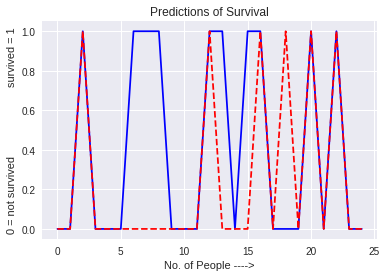

In [42]:
print("Model accuracy : %.4f" %(logisticregression.score(X_test, y_test)*100) + "%")

# plot between actual labels(y) -vs- predicted labels(y)
plt.title('Predictions of Survival')

# blue line  : Actual labels(0 or 1)
# red dashed : Predicted labels(0 or 1)
plt.plot(y_test[:25], color='blue', label='True labels')
plt.plot(y_pred[:25], 'r--', label='Predicted labels')

plt.xlabel('No. of People ---->')
plt.ylabel('0 = not survived                       survived = 1')
plt.grid(True)
plt.show()